# 18.303 Homework 3 Solutions

These solutions accompany the third problem set posted on the [18.303 web page](https://github.com/mitmath/18303). Execute the following code to import some useful linear algebra and plotting utilities used below.

In [3]:
using LinearAlgebra
using Plots

## Problem 2(c)

The $n\times n$ second-order centered difference matrix maps the vector of values $u = (u_1, u_2, \ldots, u_n)^T$ to the vector of approximate derivatives $u' = (u_1',u_2',\ldots,u_n')^T$ for a periodic function sampled at $n$ equispaced points (with spacing $h=2/n$) on the periodic interval $[-1, 1)$, where the approximate derivatives are computed via centered difference approximation:
$$
u_k' = \frac{u_{k+1}-u_{k-1}}{2h}, \qquad\text{with}\qquad u_1 = u_{n+1},
$$
Building out the matrix row by row, we collect the approximations into matrix-vector format to get
$$
\begin{pmatrix}
u_1' \\ u_2' \\ \vdots \\ u_n' 
\end{pmatrix}
=
\frac{1}{2h}\begin{pmatrix}
0 & 1 & & & -1 \\
-1 & 0 & 1 & & \\
   &  \ddots & \ddots & \ddots & \\
   & & -1 & 0 & 1 \\
   1 & & & -1 & 0
\end{pmatrix}
\begin{pmatrix}
u_1 \\ u_2 \\ \vdots \\ u_n
\end{pmatrix}.
$$
This matrix is constructed in Julia with the following code snippet.

In [6]:
## build differentiation matrix (0=>ones(n) puts length n vector of ones onto the main diagonal, 1=>ones(n-1) puts length n-1 vector of ones onto the first superdiagonal)
function fdiff2C1(n)
    h = 2 / n
    D = diagm(-1 => -ones(n-1), 1 => ones(n-1))
    D[end,1] = 1
    D[1,end] = -1
    D = D / (2*h)
end

# 12 x 12 second-order centered difference matrix
fdiff2C1(12)

12×12 Matrix{Float64}:
  0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -3.0
 -3.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -3.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -3.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -3.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -3.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -3.0   0.0   3.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -3.0   0.0   3.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -3.0   0.0   3.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -3.0   0.0   3.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -3.0   0.0   3.0
  3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -3.0   0.0

The second-order centered difference matrix for the second derivative is constructed in a similar manner and given by

$$
\begin{pmatrix}
u_1' \\ u_2' \\ \vdots \\ u_n' 
\end{pmatrix}
=
\frac{1}{h^2}\begin{pmatrix}
-2 & 1 & & & 1 \\
1 & -2 & 1 & & \\
   &  \ddots & \ddots & \ddots & \\
   & & 1 & -2 & 1 \\
   1 & & & 1 & -2
\end{pmatrix}
\begin{pmatrix}
u_1 \\ u_2 \\ \vdots \\ u_n
\end{pmatrix}.
$$

In [7]:
## build differentiation matrix (0=>ones(n) puts length n vector of ones onto the main diagonal, 1=>ones(n-1) puts length n-1 vector of ones onto the first superdiagonal)
function fdiff2C2(n)
    h = 2 / n
    D = diagm(-1 => ones(n-1), 0 => -2*ones(n), 1 => ones(n-1))
    D[end,1] = 1
    D[1,end] = 1
    D = D / (h^2)
end

# 12 x 12 second-order centered difference matrix
fdiff2C2(12)

12×12 Matrix{Float64}:
 -72.0   36.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0   36.0
  36.0  -72.0   36.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0   36.0  -72.0   36.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0   36.0  -72.0   36.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0   36.0  -72.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0   36.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0      36.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0     -72.0   36.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0      36.0  -72.0   36.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0   36.0  -72.0   36.0    0.0
   0.0    0.0    0.0    0.0    0.0  …    0.0    0.0   36.0  -72.0   36.0
  36.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   36.0  -72.0

The following code snippet combines the backward Euler method in time with the centered second-order finite-difference discretizations in space to solve the advection-diffusion equation

$$
\partial_t u(x,t) =  \alpha \partial_x^2 u(x,t) + \beta \partial_x u(x,t) = 0, \qquad\text{where}\qquad u(x,0) = 5\exp(-10\cos(\pi x)^2).
$$

┌ Info: Saved animation to C:\Users\phros\AppData\Local\Temp\jl_UkbzPJC2uf.gif
└ @ Plots C:\Users\phros\.julia\packages\Plots\M4dfL\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\phros\\AppData\\Local\\Temp\\jl_UkbzPJC2uf.gif")
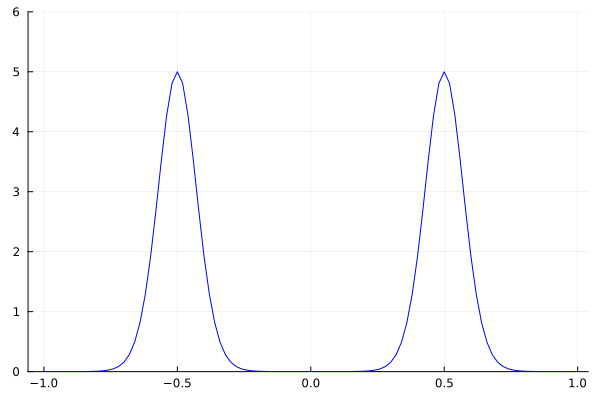

In [11]:
# computational grid = periodic interval [0, 1)
n = 100
h = 2/n
xgrid = LinRange(-1,1-h,n)

# parameters for advection and diffusion
beta = 1
alpha = 0.001 #0.001

# spatial discretization
D1 = fdiff2C1(n)            # first partial derivative with respect to spatial variable
D2 = fdiff2C2(n)            # second partial derivative with respect to spatial variable
L = alpha*D2 + beta*D1      # discretization of differential operator [Lu](x) = x^2 du/dx

# time stepping (step forward in time with time-step h_t using Forward Euler)
ht = 0.01                   # time step
function time_step(L,u1,ht)
    u2 = (I - ht * L) \ u1  # backward Euler
    #u2 = (I + ht * L) * u1
end

# initial condition
u1 = 5*exp.(-10*cos.(pi*xgrid).^2)

# time stepping gif
anim = Animation()
m = 500                         # number of steps in time 
for k ∈ 1:m                     # animate solution
    plot(xgrid, u1, linecolor = :blue, legend = false)
    ylims!(0.0,6)
    u1 = time_step(L,u1,ht)
    frame(anim)
end
gif(anim)